In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
dfs_pair={}
dfs_trigger={}

In [6]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [7]:
%%time
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


CPU times: user 4.05 s, sys: 1.05 s, total: 5.11 s
Wall time: 5.24 s


In [8]:
for dct in dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['D_C', 'D_Fe', 'D_Pb'])
dict_keys(['D_C', 'D_Fe', 'D_Pb'])


In [12]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D']:
    for suffix in "", "_tweak", "_tweak2", "_tweak_harut":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


dict_keys(['D_C', 'D_Fe', 'D_Pb', 'D', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut'])


In [13]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  D_C
Entries before cut  47014
Q2>1.0 and Q2<4.0 47014  (100.00  %)
0.2<h1_p<5.0  47014  (100.00  %)
inelasticity < 0.85 47014  (100.00  %)
h1_pid = pions (trigger) 47014  (100.00  %)
2.2 < nu <4.2 47014  (100.00  %)
10< h1_th 47014  (100.00  %)
Theta/P fiducial region selected for trigger hadron 47014  (100.00  %)
Nom cuts for the trigger applied 47014  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 47014  (100.00  %)
2.2 < nu < 4.2 47014  (100.00  %)
secondary hadrons are pions 47014  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 47014  (100.00  %)
kinematic limits for h2_z 47014  (100.00  %)
kinematic limits for dphi 47014  (100.00  %)
kinematic limits for pair_mass 47014  (100.00  %)
leading hadrons are pions 47014  (100.00  %)
0.2<h2_p<5.0 47014  (100.00  %)
0.2<h1_p<5.0 47014  (100.00  %)
10<h2_th 47014  (100.00  %)
Theta/P fiducial region selected for secondary hadron 47014  (100.00  %)
10< h1_th 47014  (100.00  %)
Theta/P fiducial regio

In [14]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

D_C False
Entries before cut  405810
Q2>1.0 and Q2<4.0 405810  (100.00  %)
0.2<h1_p<5.0  405810  (100.00  %)
inelasticity < 0.85 405810  (100.00  %)
h1_pid = pions (trigger) 405810  (100.00  %)
2.2 < nu <4.2 405810  (100.00  %)
10< h1_th 405810  (100.00  %)
Theta/P fiducial region selected for trigger hadron 405810  (100.00  %)
Nom cuts for the trigger applied 405810  (100.00  %)
 
D_Fe False
Entries before cut  667932
Q2>1.0 and Q2<4.0 667932  (100.00  %)
0.2<h1_p<5.0  667932  (100.00  %)
inelasticity < 0.85 667932  (100.00  %)
h1_pid = pions (trigger) 667932  (100.00  %)
2.2 < nu <4.2 667932  (100.00  %)
10< h1_th 667932  (100.00  %)
Theta/P fiducial region selected for trigger hadron 667932  (100.00  %)
Nom cuts for the trigger applied 667932  (100.00  %)
 
D_Pb False
Entries before cut  630177
Q2>1.0 and Q2<4.0 630177  (100.00  %)
0.2<h1_p<5.0  630177  (100.00  %)
inelasticity < 0.85 630177  (100.00  %)
h1_pid = pions (trigger) 630177  (100.00  %)
2.2 < nu <4.2 630177  (100.00  %)


In [15]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



In [16]:
pid = 211; pMin=.350; pT1min=.25; pT2min=.25
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"

#q+= " and h1_p < 2.7"

default 1.086398251875992
all but PARJ(21) 1.1504743720285915
all tweaked vars 1.1722844028287716
data (uncorr) 1.147316725331191


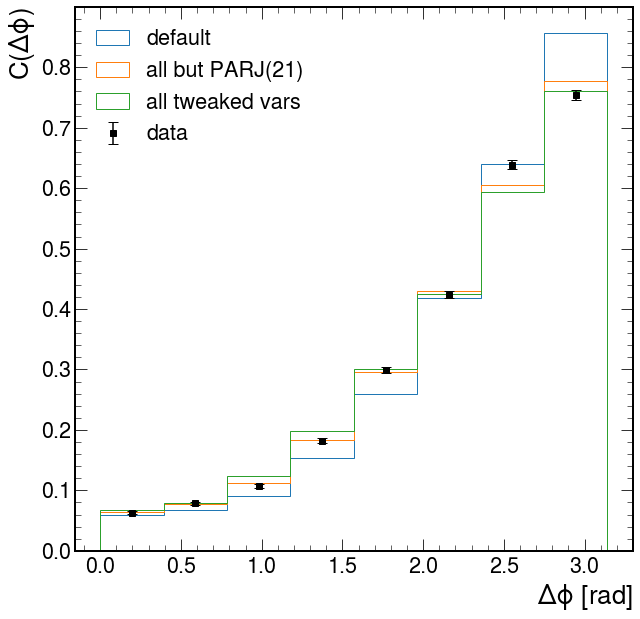

In [17]:

for tweak_tag in "","_tweak2", "_tweak_harut":
    df = dfs_pair[f'GiBUU_D{tweak_tag}'].query(q+ " and " + pThetaCuts_pair)
    
    lbl = {"":"default", "_tweak2": "all but PARJ(21)", "_tweak_harut": "all tweaked vars"}[tweak_tag]
    y, x, _ = plt.hist(df.dphi, bins=8, range=(0, np.pi), histtype='step', label=lbl, density=True)
    x=(x[1:]+x[:-1])/2
    w=np.sqrt(sum(y*(x-np.pi)**2)/sum(y))
    print(lbl, w)
df = dfs_pair[f'D'].query(q+ " and " + pThetaCuts_pair)
y, x = np.histogram(df.dphi, bins=8, range=(0, np.pi))
dy=np.sqrt(y)/sum(y)*len(y)/np.pi
y=y/sum(y)*len(y)/np.pi

x=(x[1:]+x[:-1])/2
w=np.sqrt(sum(y*(x-np.pi)**2)/sum(y))
print("data (uncorr)", w)
#data=np.array( [0.044563246191524825, 0.052730785430840685, 0.06804379490784453, 0.10172473281959185, 0.15529080262729392, 0.21319294425143565, 0.3017537506329588, 0.3359394878736724] )
#ddata_stat=np.array( [0.001740054048562332, 0.0018440544513684965, 0.0020266594444374574, 0.0023235034970536437, 0.0027520821150895927, 0.0031630350719495932, 0.00363243168323586, 0.0037155414319713165] )
#ddata_tot=np.array( [0.004774649823907977, 0.0038889803187700583, 0.0038644743661682738, 0.004805289759685645, 0.006441035421788142, 0.007923848866986084, 0.011184432513663205, 0.01693147546271249] )
plt.errorbar(x, y, dy, linestyle='', 
                                    marker='s', capsize=5, label='data', color='k')
plt.xlabel("$\Delta\phi$ [rad]")
plt.ylabel("$C(\Delta\phi)$")
plt.legend()
plt.show()

In [18]:
tweak_tag ="_tweak_harut"
df = dfs_pair[f'GiBUU_D{tweak_tag}'].query(q+ " and " + pThetaCuts_pair)
y, x=np.histogram(df.dphi, bins=8, range=(0, np.pi))
print(1/np.sqrt(y))


[0.02058031 0.01897632 0.01515848 0.01193695 0.00969595 0.00816932
 0.00690773 0.00609938]


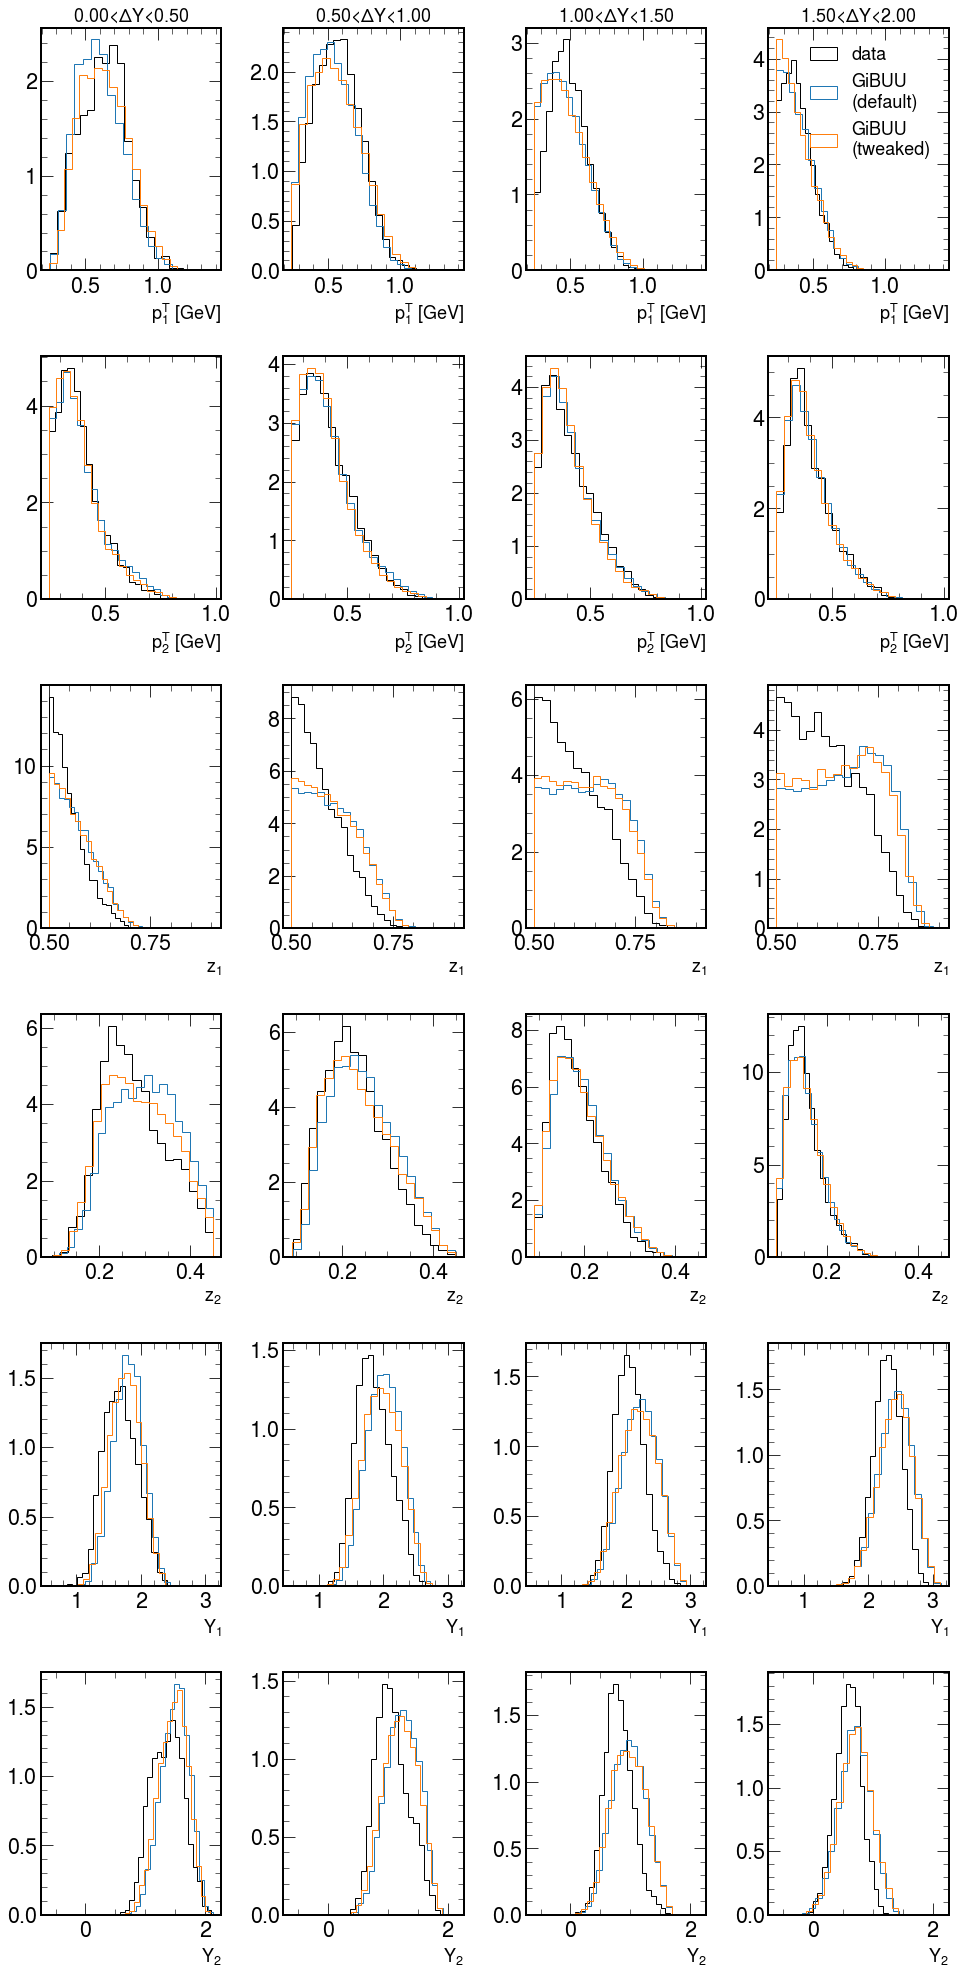

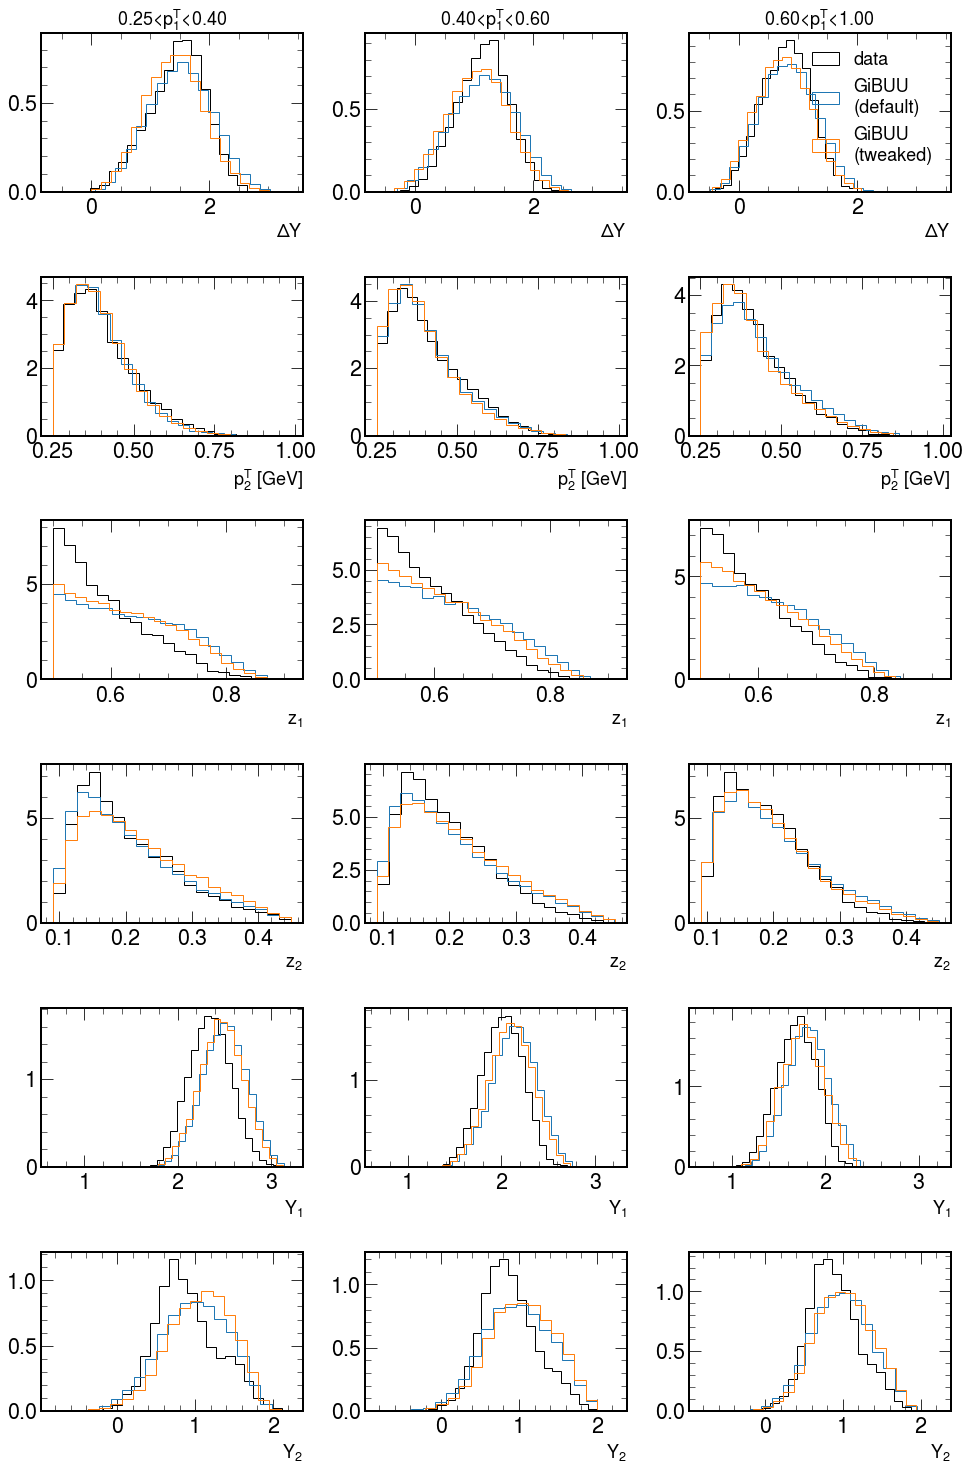

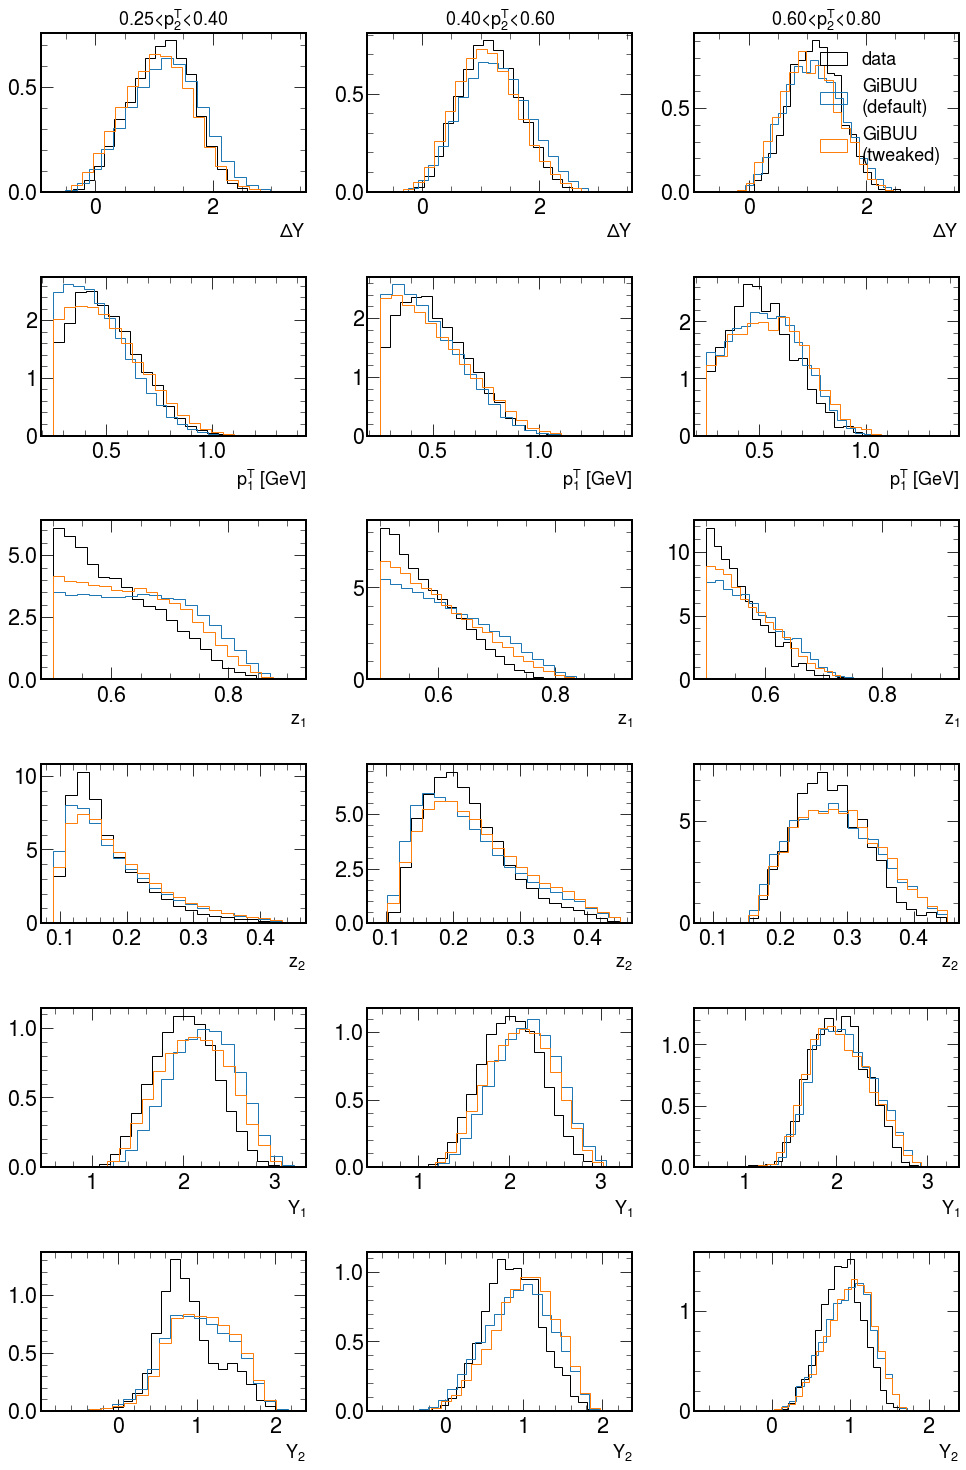

In [27]:
slicenames="drap", "h1_cm_pt", "h2_cm_pt"
slicelatexs="$\\Delta{}Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]"
slicevals=[0, 0.5, 1, 1.5, 2], [.25, .40,0.60, 1.0], [.25, .40,.60, .80]
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
GiBUU_suffix="_tweak2"
a='D'
dfd= dfs_pair[f'{a}'].query(q)

for slicename, slicelatex, sliceval in zip(slicenames, slicelatexs, slicevals):
    fig, axs =plt.subplots(6,len(sliceval)-1, figsize=(14, 7*(len(sliceval)-1)),
                          sharex='row')
    for i in range(len(sliceval)-1):
        xnames="drap h1_cm_pt h2_cm_pt h1_z h2_z h1_rap+ycm h2_rap+ycm".split()
        xnames=[name for name in xnames if name != slicename]
        xlatexs=("$\\Delta{}Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]", "$z_1$", 
                        "$z_2$", "$Y_1$", "$Y_2$")
        xlatexs=[name for name in xlatexs if name != slicelatex]
        for j in range(6):
            plt.sca(axs[j][i])
            sliceq=f"{slicename}>{sliceval[i]} and {slicename}<{sliceval[i+1]}"
            plt.hist(dfd.query(sliceq).eval(xnames[j]), bins=20, histtype='step', density=True,
                    color='k', label='data')
            for GiBUU_suffix in '', "_tweak_harut":
                dfg = dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q)
                plt.hist(dfg.query(sliceq).eval(xnames[j]), bins=20, histtype='step', density=True,
                        label="GiBUU\n(default)" if GiBUU_suffix=='' else "GiBUU\n(tweaked)")
            plt.xlabel(xlatexs[j],fontsize=18)
        axs[0][i].set_title(f"{sliceval[i]:.2f}<{slicelatex.split()[0]}<{sliceval[i+1]:.2f}"
                            + (" [GeV]" if "pt" in slicename),
                           fontsize=18)
    axs[0][-1].legend(fontsize=18)
    
    plt.tight_layout()
    #plt.savefig("figures/GiBUU_vs_data_distributions_{slicename}.pdf")
    plt.show()